In [3]:
import numpy as np
import matplotlib.pyplot as plt



In [4]:
means = [2.13, -99, 0.11, -1.01] # cztery zmienne z innymi średnimi

# Macierz kowariancji
cov_matrix = np.array([[1, 0.96, 0, 0], [0.96, 1, 0, 0], [0, 0, 1, 0.87], [0, 0, 0.87, 1]])
print('Covariance matrix')
print(cov_matrix)

n=1000 # Liczba wierszy
df = np.random.multivariate_normal(means, cov_matrix, n)
print('Dataframe:')
print(df)

Covariance matrix
[[1.   0.96 0.   0.  ]
 [0.96 1.   0.   0.  ]
 [0.   0.   1.   0.87]
 [0.   0.   0.87 1.  ]]
Dataframe:
[[   4.38490105  -96.64637396    0.42704183   -1.31074478]
 [   0.70304177 -100.25370321   -2.41996623   -3.65661705]
 [   2.0560605   -98.92508233    1.89010654    0.68532423]
 ...
 [   1.36953399  -99.56007124   -0.16617462   -0.97123619]
 [   1.41894674  -99.49750659    0.84412566   -0.87274775]
 [   2.47183602  -98.84318633    0.69645816   -0.73552172]]


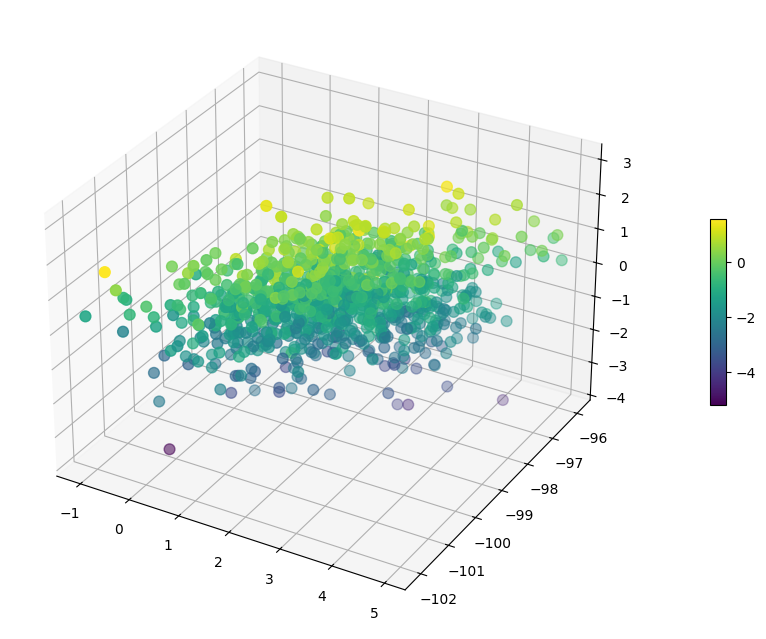

In [5]:
fig = plt.figure(figsize=(8, 16))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=df[:,0], ys=df[:,1], zs=df[:,2], c=df[:,3], s=60)
cax = fig.add_axes([ax.get_position().x1+0.10, ax.get_position().y0+0.14, 0.02, ax.get_position().height*0.3])
fig.colorbar(img, cax=cax)
plt.show()

In [6]:
print('Przed standaryzacją')
print('Średnia:\n',df.mean(axis=0))
print('Odchylenie standardowe:\n',df.std(axis=0))

# Standaryzacja
df_standardizated = (df - np.mean(df, axis=0)) / np.std(df, axis=0)

print('\nPo standaryzacji')
print('Średnia:\n',df_standardizated.mean(axis=0))
print('Odchylenie standardowe:\n',df_standardizated.std(axis=0))

Przed standaryzacją
Średnia:
 [  2.11997746 -98.997995     0.11271839  -1.01067951]
Odchylenie standardowe:
 [0.98306572 0.9863697  1.02749304 1.0260254 ]

Po standaryzacji
Średnia:
 [ 4.46920279e-16 -2.64697153e-14 -2.17714735e-16 -9.16433596e-16]
Odchylenie standardowe:
 [1. 1. 1. 1.]


In [7]:
covariance_matrix = np.cov(df_standardizated.T)
covariance_matrix

array([[ 1.00100100e+00,  9.56875699e-01,  1.07778234e-02,
         1.47560037e-02],
       [ 9.56875699e-01,  1.00100100e+00, -5.73697489e-04,
         7.67114682e-04],
       [ 1.07778234e-02, -5.73697489e-04,  1.00100100e+00,
         8.81241510e-01],
       [ 1.47560037e-02,  7.67114682e-04,  8.81241510e-01,
         1.00100100e+00]])

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('Wartości własne:\n',eigenvalues,'\n\nWektory własne:\n',eigenvectors)

Wartości własne:
 [1.96001061 1.88019978 0.044015   0.11977861] 

Wektory własne:
 [[-0.69837092 -0.11070429 -0.70703268  0.01128749]
 [-0.69684166 -0.12033177  0.70693296 -0.01333223]
 [-0.11450692  0.69776132 -0.00743675 -0.70707991]
 [-0.11652435  0.6974195   0.01718338  0.70691785]]


In [9]:
explained_variance = [round((i/np.sum(eigenvalues)), 3) for i in sorted(eigenvalues, reverse=True)]
print(explained_variance)

[np.float64(0.49), np.float64(0.47), np.float64(0.03), np.float64(0.011)]


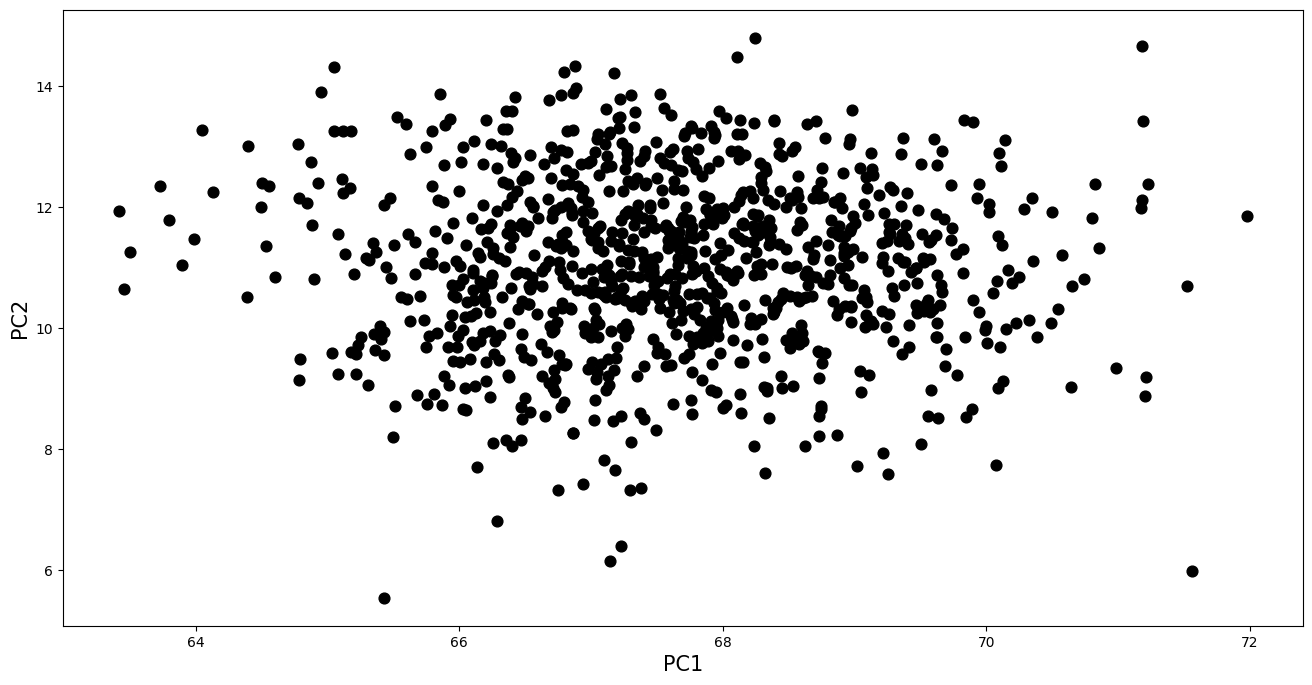

In [10]:
eigenpairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenpairs.sort(key = lambda k: k[0], reverse=True)
w = np.hstack((eigenpairs[0][1][:, np.newaxis],
               eigenpairs[1][1][:, np.newaxis]))
pc1 = df.dot(w.T[0])
pc2 = df.dot(w.T[1])
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111)
ax.scatter(x=pc1, y=pc2, c='black', s=60)
ax.set_xlabel(xlabel='PC1', rotation=0, loc='center', size=15)
ax.set_ylabel(ylabel='PC2', rotation=90, loc='center', size=15)
plt.show()

In [11]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [15]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


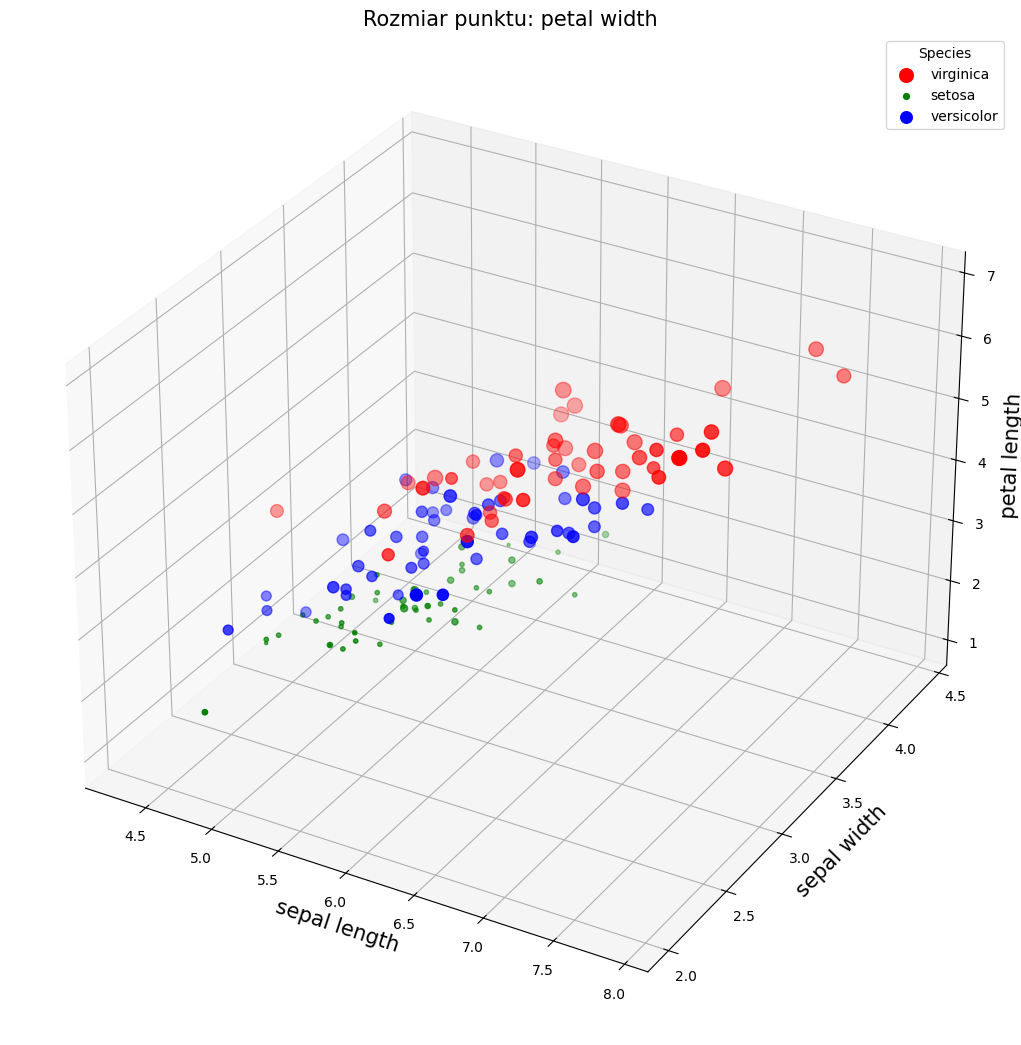

In [16]:
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(xs=iris.loc[iris['species']=='virginica', 'sepal_length'],
                 ys=iris.loc[iris['species']=='virginica','sepal_width'],
                 zs=iris.loc[iris['species']=='virginica', 'petal_length'],
                 s=iris.loc[iris['species']=='virginica','petal_width']*50,
                 c='red', label='virginica')
img = ax.scatter(xs=iris.loc[iris['species']=='setosa', 'sepal_length'],
                 ys=iris.loc[iris['species']=='setosa','sepal_width'],
                 zs=iris.loc[iris['species']=='setosa', 'petal_length'],
                 s=iris.loc[iris['species']=='setosa','petal_width']*50,
                 c='green', label='setosa')
img = ax.scatter(xs=iris.loc[iris['species']=='versicolor', 'sepal_length'],
                 ys=iris.loc[iris['species']=='versicolor','sepal_width'],
                 zs=iris.loc[iris['species']=='versicolor', 'petal_length'],
                 s=iris.loc[iris['species']=='versicolor','petal_width']*50,
                 c='blue', label='versicolor')
ax.set_xlabel(xlabel='sepal length', size=15)
ax.set_ylabel(ylabel='sepal width', size=15)
ax.set_zlabel(zlabel='petal length', size=15)
ax.set_title('Rozmiar punktu: petal width', size=15)
plt.legend(title='Species')
plt.show()

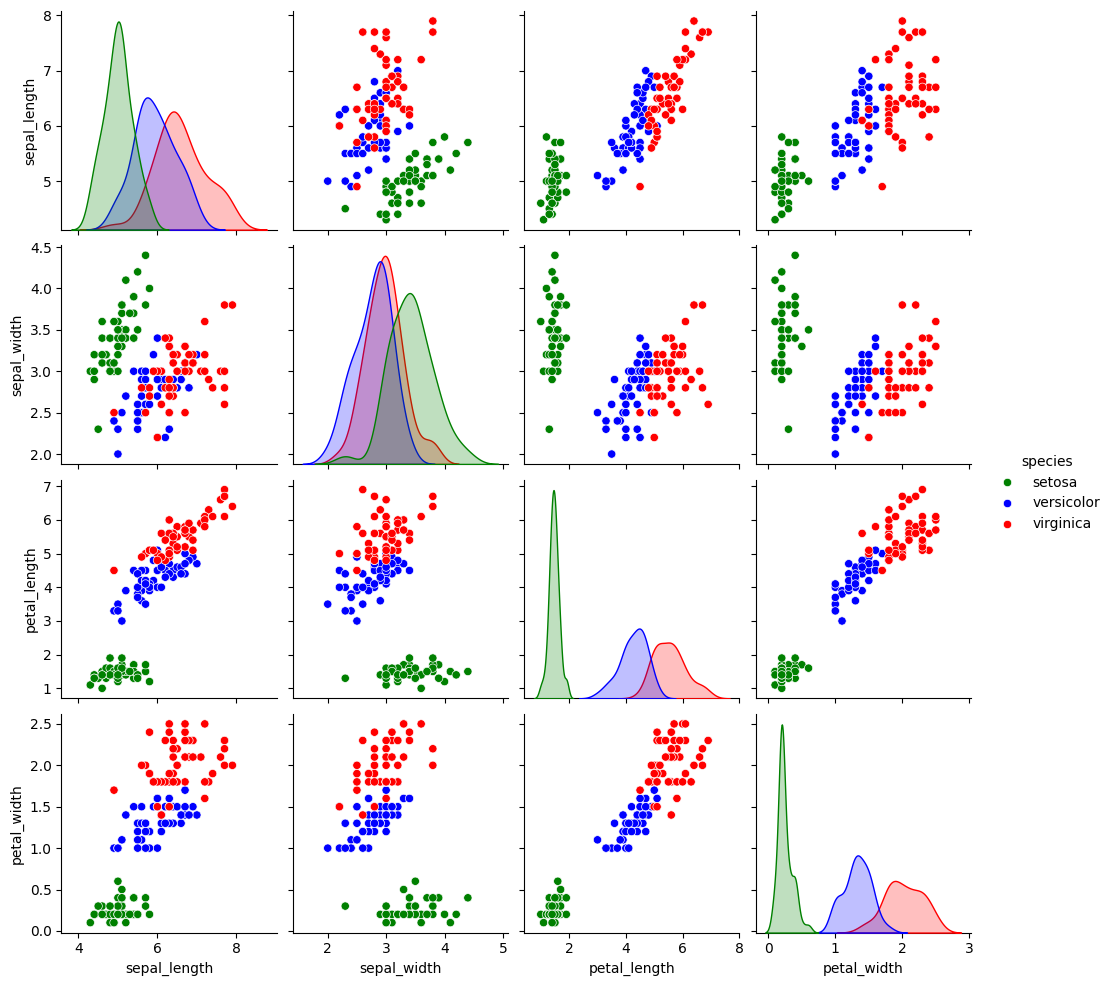

In [17]:
sns.pairplot(iris,
             hue='species',
             palette={'virginica': 'red', 'setosa': 'green', 'versicolor': 'blue'})
plt.show()

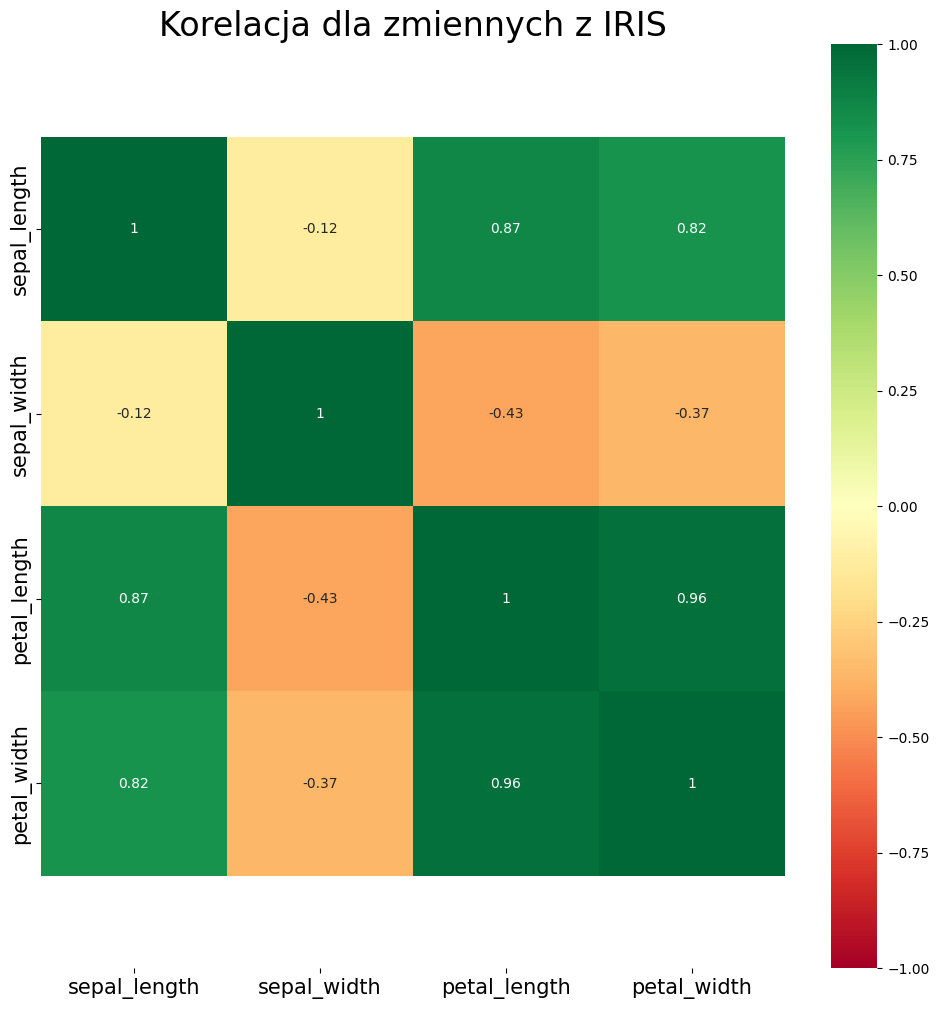

In [19]:
plt.figure(figsize=(12, 12))
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
ax = sns.heatmap(iris[features].corr(),
                 xticklabels=features,
                 yticklabels=features,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z IRIS', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X = iris.drop('species', axis=1).copy()
y = iris['species'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_iris = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_iris.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'species'},
                  inplace=True)
train_iris[['PC1', 'PC2','PC3','PC4']] = train_iris[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_iris[['PC1', 'PC2','PC3','PC4']].corr()

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,2.822043e-16,6.186860e-16,3.193798e-15
PC2,2.822043e-16,1.000000e+00,-5.549397e-16,1.420110e-15
PC3,6.186860e-16,-5.549397e-16,1.000000e+00,1.578391e-14
PC4,3.193798e-15,1.420110e-15,1.578391e-14,1.000000e+00


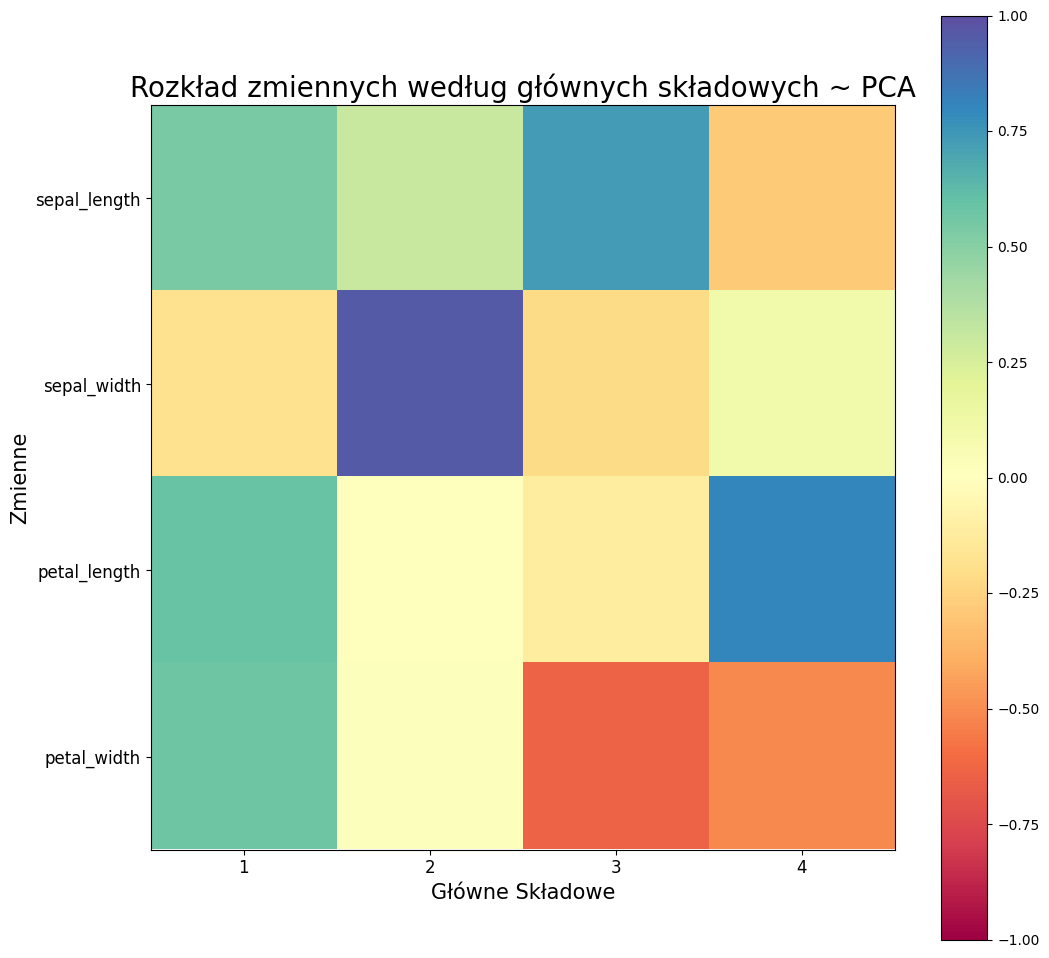

In [24]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

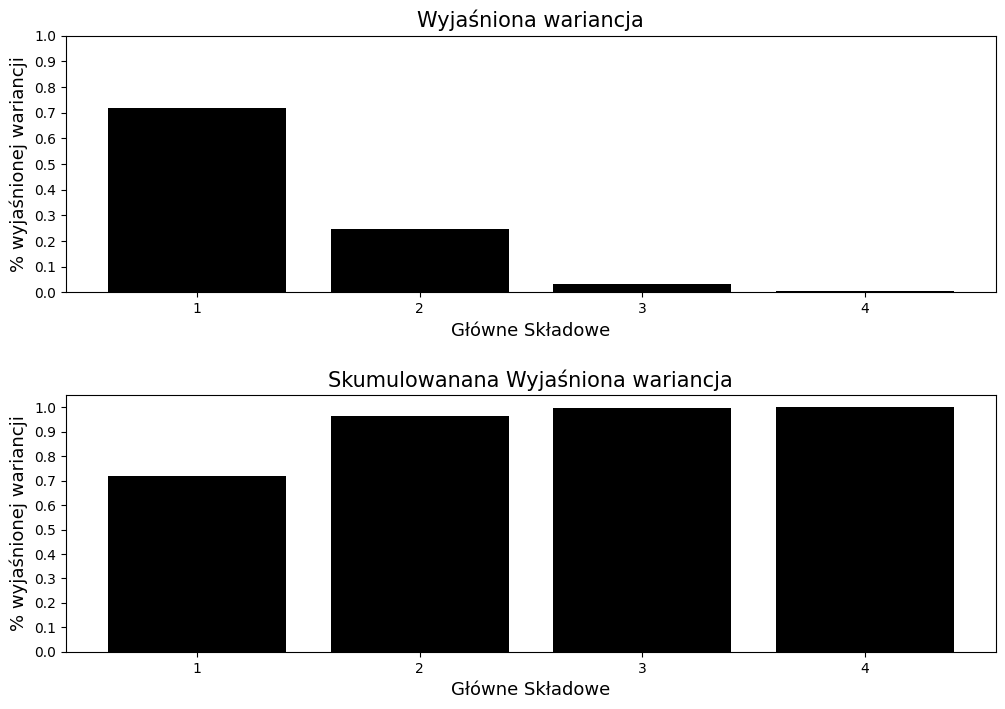

Główna składowa: 1, Wyjaśniona wariancja: 0.71702, Skumulowana Wyjaśniona wariancja: 0.71702
Główna składowa: 2, Wyjaśniona wariancja: 0.24713, Skumulowana Wyjaśniona wariancja: 0.96415
Główna składowa: 3, Wyjaśniona wariancja: 0.03156, Skumulowana Wyjaśniona wariancja: 0.99572
Główna składowa: 4, Wyjaśniona wariancja: 0.00428, Skumulowana Wyjaśniona wariancja: 1.0


In [25]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

In [27]:
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
import datetime

X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.9467   |             35757              |
|   Skalowane dane  |   0.9467   |              5201              |
|        4 PC       |   0.9467   |              3995              |
|        3 PC       |   0.9467   |              4516              |
|        2 PC       |   0.9067   |              4886              |
|        1 PC       |   0.9067   |             12698              |
+-------------------+------------+--------------------------------+
